# UNIVERSIDAD POLITECNICA SALESIANA

In [10]:
#### IMPORTAMOS LAS LIBRERIAS A SER USADAS
import simpy
import random 
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime

MESAS = 20 
TIEMPO_VACUNACION = 5
SEMANAS = 4
TIEMPO_SIMULACION =  SEMANAS *3*9*60
CONTROL_SIGNOS =5
TIEMPO_POST_VACUNA = 15
tiempo_vacunacion={}
cont={0:1}
FECHA_ACTUAL = datetime.now().strftime('%d/%m/%Y')
personas_reasignadas={}
tiempo_vacunacion={}
estado_personas={}


class VacunasEstado():
    def __init__(self, env):
        self.env = env
        self.dispensador = simpy.Resource(env, capacity=MESAS)
        self.bodega = simpy.Container(env, init=350, capacity=800)
        self.monitoreo = env.process(self.monitoreo_bodega())
    def monitoreo_bodega(self,):
        while True:
            if self.bodega.level <= 10:
                self.logs_procesos('++++','Solicitar nuevas vacunas ', self.env.now)
                env.process(self.solicitar_vacunas())
            yield self.env.timeout(15)
    def solicitar_vacunas(self,):
        yield self.env.timeout(50)
        self.logs_procesos('','llega suministro vacunas ',self.env.now)
        nivel = self.bodega.capacity - self.bodega.level
        if nivel ==0:
            nivel+=1
        yield self.bodega.put(nivel)
        
    def logs_procesos(self,icon, accion, hora):
        print(" %s accion:  [%s] hora:  [%d] "%(icon, accion, hora))

In [11]:
class Vacunacion():
    def __init__(self, env, nombre, estadoVacunas):
        self.env = env
        self.nombre = nombre 
        self.estado_vacunas = estadoVacunas
        self.proceso = env.process(self.proceso_vacunacion())
        self.personas_vacunadas = 0
    def control_signos(self):
        yield self.env.timeout(random.randint(CONTROL_SIGNOS, CONTROL_SIGNOS+2))
    
    def logs_procesos(self,icon,nombre, accion, hora):
        print(" %s nombre: [%s] accion:  [%s] hora:  [%d] "%(icon,nombre, accion, hora))
    
    def aplicar_vacuna(self):
        yield self.env.timeout(random.randint(TIEMPO_VACUNACION, TIEMPO_VACUNACION+5))
        
    def post_vacuna(self, tiempo):
        yield self.env.timeout(tiempo)
    
    def proceso_vacunacion(self,):
        while True:
            nombre= 'persona '+str(cont[0])
            cont[0]=cont[0]+1
            self.logs_procesos("--->",nombre," llega al recinto",self.env.now)
            estado_personas[nombre]='cola'
            yield env.process(self.control_signos())
            if random.randint(1,100) > 10:
                self.logs_procesos("", nombre, "pasa el control", env.now)
                estado_personas[nombre]='pasa control'
                inicio_vacunacion =  self.env.now
                if self.estado_vacunas.bodega.level >=1:
                    yield env.process(self.aplicar_vacuna())
                    estado_personas[nombre]='vacunado'
                    self.estado_vacunas.bodega.get(1)
                    tiempo_vacunacion[nombre] = self.env.now - inicio_vacunacion
                    self.logs_procesos("", nombre, "fue vacunada ", self.env.now)
                    yield env.process(self.post_vacuna(TIEMPO_POST_VACUNA))
                    self.logs_procesos("", nombre, "sin complicaciones", self.env.now)
                    self.personas_vacunadas += 1
                    estado_personas[nombre]='completo'
                    
                else:
                    prox_cita = datetime.strftime(datetime.strptime(FECHA_ACTUAL, '%d/%m/%Y')+dt.timedelta(days=3), '%d/%m/%Y')
                    print("--XX-- No hay vacunas para %s, reasignado fecha para: %s"%(nombre, prox_cita))
                    personas_reasignadas[nombre]='reasignado'
                    estado_personas[nombre]='reasignado'
                                
            else:
                self.logs_procesos("", nombre,"no pasa el control", self.env.now)
                estado_personas[nombre]='no control'
env = simpy.Environment()

vacunasEstado = VacunasEstado(env)
vacunacion =[Vacunacion(env,"Mesa %d"% i, vacunasEstado) for i in range(MESAS)]
env.run(until=TIEMPO_SIMULACION)
print("Simulacion realizada despues de %d semanas"%SEMANAS)
for i in vacunacion:
    print("La [%s] ha vacunado a [%d] personas"%(i.nombre,i.personas_vacunadas))

 ---> nombre: [persona 1] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 2] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 3] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 4] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 5] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 6] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 7] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 8] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 9] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 10] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 11] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 12] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 13] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 14] accion:  [ llega al recinto] hora:  [0] 
 ---> nombre: [persona 15] accion:  [ llega al recinto] h

  nombre: [persona 374] accion:  [sin complicaciones] hora:  [501] 
 ---> nombre: [persona 394] accion:  [ llega al recinto] hora:  [501] 
  nombre: [persona 382] accion:  [fue vacunada ] hora:  [501] 
  nombre: [persona 387] accion:  [pasa el control] hora:  [501] 
  nombre: [persona 372] accion:  [sin complicaciones] hora:  [502] 
 ---> nombre: [persona 395] accion:  [ llega al recinto] hora:  [502] 
  nombre: [persona 384] accion:  [fue vacunada ] hora:  [502] 
  nombre: [persona 389] accion:  [pasa el control] hora:  [502] 
  nombre: [persona 376] accion:  [sin complicaciones] hora:  [503] 
 ---> nombre: [persona 396] accion:  [ llega al recinto] hora:  [503] 
  nombre: [persona 388] accion:  [pasa el control] hora:  [503] 
  nombre: [persona 390] accion:  [pasa el control] hora:  [503] 
  nombre: [persona 391] accion:  [pasa el control] hora:  [503] 
  nombre: [persona 392] accion:  [pasa el control] hora:  [503] 
  nombre: [persona 380] accion:  [sin complicaciones] hora:  [505] 

  nombre: [persona 776] accion:  [pasa el control] hora:  [944] 
  nombre: [persona 777] accion:  [pasa el control] hora:  [944] 
  nombre: [persona 772] accion:  [fue vacunada ] hora:  [945] 
  nombre: [persona 780] accion:  [pasa el control] hora:  [945] 
  nombre: [persona 778] accion:  [no pasa el control] hora:  [947] 
 ---> nombre: [persona 785] accion:  [ llega al recinto] hora:  [947] 
  nombre: [persona 779] accion:  [pasa el control] hora:  [947] 
  nombre: [persona 765] accion:  [sin complicaciones] hora:  [948] 
 ---> nombre: [persona 786] accion:  [ llega al recinto] hora:  [948] 
  nombre: [persona 781] accion:  [pasa el control] hora:  [948] 
  nombre: [persona 782] accion:  [pasa el control] hora:  [948] 
  nombre: [persona 783] accion:  [pasa el control] hora:  [948] 
  nombre: [persona 775] accion:  [fue vacunada ] hora:  [948] 
  nombre: [persona 777] accion:  [fue vacunada ] hora:  [949] 
  nombre: [persona 774] accion:  [fue vacunada ] hora:  [950] 
  nombre: [pers

  nombre: [persona 1036] accion:  [sin complicaciones] hora:  [1314] 
 ---> nombre: [persona 1058] accion:  [ llega al recinto] hora:  [1314] 
  nombre: [persona 1053] accion:  [pasa el control] hora:  [1314] 
  nombre: [persona 1054] accion:  [no pasa el control] hora:  [1315] 
 ---> nombre: [persona 1059] accion:  [ llega al recinto] hora:  [1315] 
  nombre: [persona 1049] accion:  [fue vacunada ] hora:  [1316] 
  nombre: [persona 1039] accion:  [sin complicaciones] hora:  [1317] 
 ---> nombre: [persona 1060] accion:  [ llega al recinto] hora:  [1317] 
  nombre: [persona 1055] accion:  [pasa el control] hora:  [1318] 
  nombre: [persona 1050] accion:  [fue vacunada ] hora:  [1318] 
  nombre: [persona 1040] accion:  [sin complicaciones] hora:  [1319] 
 ---> nombre: [persona 1061] accion:  [ llega al recinto] hora:  [1319] 
  nombre: [persona 1041] accion:  [sin complicaciones] hora:  [1319] 
 ---> nombre: [persona 1062] accion:  [ llega al recinto] hora:  [1319] 
  nombre: [persona 10

  nombre: [persona 1455] accion:  [no pasa el control] hora:  [1785] 
 ---> nombre: [persona 1474] accion:  [ llega al recinto] hora:  [1785] 
  nombre: [persona 1456] accion:  [pasa el control] hora:  [1785] 
--XX-- No hay vacunas para persona 1456, reasignado fecha para: 07/08/2021
 ---> nombre: [persona 1475] accion:  [ llega al recinto] hora:  [1785] 
  nombre: [persona 1459] accion:  [no pasa el control] hora:  [1785] 
 ---> nombre: [persona 1476] accion:  [ llega al recinto] hora:  [1785] 
  nombre: [persona 1454] accion:  [pasa el control] hora:  [1786] 
--XX-- No hay vacunas para persona 1454, reasignado fecha para: 07/08/2021
 ---> nombre: [persona 1477] accion:  [ llega al recinto] hora:  [1786] 
  nombre: [persona 1458] accion:  [pasa el control] hora:  [1786] 
--XX-- No hay vacunas para persona 1458, reasignado fecha para: 07/08/2021
 ---> nombre: [persona 1478] accion:  [ llega al recinto] hora:  [1786] 
  nombre: [persona 1460] accion:  [pasa el control] hora:  [1786] 
--

  nombre: [persona 1879] accion:  [sin complicaciones] hora:  [2293] 
 ---> nombre: [persona 1901] accion:  [ llega al recinto] hora:  [2293] 
  nombre: [persona 1894] accion:  [pasa el control] hora:  [2293] 
  nombre: [persona 1881] accion:  [sin complicaciones] hora:  [2294] 
 ---> nombre: [persona 1902] accion:  [ llega al recinto] hora:  [2294] 
  nombre: [persona 1890] accion:  [fue vacunada ] hora:  [2294] 
  nombre: [persona 1880] accion:  [sin complicaciones] hora:  [2295] 
 ---> nombre: [persona 1903] accion:  [ llega al recinto] hora:  [2295] 
  nombre: [persona 1895] accion:  [pasa el control] hora:  [2295] 
  nombre: [persona 1892] accion:  [fue vacunada ] hora:  [2296] 
  nombre: [persona 1883] accion:  [sin complicaciones] hora:  [2297] 
 ---> nombre: [persona 1904] accion:  [ llega al recinto] hora:  [2297] 
  nombre: [persona 1898] accion:  [pasa el control] hora:  [2297] 
  nombre: [persona 1893] accion:  [fue vacunada ] hora:  [2297] 
  nombre: [persona 1882] accion:

  nombre: [persona 2270] accion:  [pasa el control] hora:  [2778] 
  nombre: [persona 2271] accion:  [pasa el control] hora:  [2778] 
  nombre: [persona 2251] accion:  [sin complicaciones] hora:  [2779] 
 ---> nombre: [persona 2273] accion:  [ llega al recinto] hora:  [2779] 
  nombre: [persona 2260] accion:  [fue vacunada ] hora:  [2779] 
  nombre: [persona 2265] accion:  [fue vacunada ] hora:  [2779] 
  nombre: [persona 2250] accion:  [sin complicaciones] hora:  [2780] 
 ---> nombre: [persona 2274] accion:  [ llega al recinto] hora:  [2780] 
  nombre: [persona 2253] accion:  [sin complicaciones] hora:  [2780] 
 ---> nombre: [persona 2275] accion:  [ llega al recinto] hora:  [2780] 
  nombre: [persona 2254] accion:  [sin complicaciones] hora:  [2780] 
 ---> nombre: [persona 2276] accion:  [ llega al recinto] hora:  [2780] 
  nombre: [persona 2261] accion:  [fue vacunada ] hora:  [2780] 
  nombre: [persona 2264] accion:  [fue vacunada ] hora:  [2780] 
  nombre: [persona 2263] accion:  

 ---> nombre: [persona 2702] accion:  [ llega al recinto] hora:  [3234] 
  nombre: [persona 2687] accion:  [sin complicaciones] hora:  [3234] 
 ---> nombre: [persona 2703] accion:  [ llega al recinto] hora:  [3234] 
  nombre: [persona 2689] accion:  [sin complicaciones] hora:  [3234] 
 ---> nombre: [persona 2704] accion:  [ llega al recinto] hora:  [3234] 
  nombre: [persona 2685] accion:  [sin complicaciones] hora:  [3235] 
 ---> nombre: [persona 2705] accion:  [ llega al recinto] hora:  [3235] 
  nombre: [persona 2688] accion:  [sin complicaciones] hora:  [3235] 
 ---> nombre: [persona 2706] accion:  [ llega al recinto] hora:  [3235] 
  nombre: [persona 2698] accion:  [pasa el control] hora:  [3235] 
  nombre: [persona 2696] accion:  [fue vacunada ] hora:  [3236] 
  nombre: [persona 2681] accion:  [sin complicaciones] hora:  [3237] 
 ---> nombre: [persona 2707] accion:  [ llega al recinto] hora:  [3237] 
  nombre: [persona 2684] accion:  [sin complicaciones] hora:  [3237] 
 ---> nomb

  nombre: [persona 3136] accion:  [fue vacunada ] hora:  [3805] 
  nombre: [persona 3126] accion:  [sin complicaciones] hora:  [3806] 
 ---> nombre: [persona 3147] accion:  [ llega al recinto] hora:  [3806] 
  nombre: [persona 3141] accion:  [pasa el control] hora:  [3806] 
  nombre: [persona 3142] accion:  [pasa el control] hora:  [3806] 
  nombre: [persona 3143] accion:  [pasa el control] hora:  [3806] 
  nombre: [persona 3125] accion:  [sin complicaciones] hora:  [3807] 
 ---> nombre: [persona 3148] accion:  [ llega al recinto] hora:  [3807] 
  nombre: [persona 3135] accion:  [fue vacunada ] hora:  [3807] 
  nombre: [persona 3137] accion:  [fue vacunada ] hora:  [3807] 
  nombre: [persona 3144] accion:  [pasa el control] hora:  [3809] 
  nombre: [persona 3140] accion:  [fue vacunada ] hora:  [3809] 
  nombre: [persona 3146] accion:  [pasa el control] hora:  [3809] 
  nombre: [persona 3128] accion:  [sin complicaciones] hora:  [3810] 
 ---> nombre: [persona 3149] accion:  [ llega al 

--XX-- No hay vacunas para persona 3549, reasignado fecha para: 07/08/2021
 ---> nombre: [persona 3569] accion:  [ llega al recinto] hora:  [4311] 
  nombre: [persona 3550] accion:  [no pasa el control] hora:  [4311] 
 ---> nombre: [persona 3570] accion:  [ llega al recinto] hora:  [4311] 
  nombre: [persona 3551] accion:  [pasa el control] hora:  [4312] 
--XX-- No hay vacunas para persona 3551, reasignado fecha para: 07/08/2021
 ---> nombre: [persona 3571] accion:  [ llega al recinto] hora:  [4312] 
  nombre: [persona 3554] accion:  [pasa el control] hora:  [4312] 
--XX-- No hay vacunas para persona 3554, reasignado fecha para: 07/08/2021
 ---> nombre: [persona 3572] accion:  [ llega al recinto] hora:  [4312] 
  nombre: [persona 3558] accion:  [no pasa el control] hora:  [4312] 
 ---> nombre: [persona 3573] accion:  [ llega al recinto] hora:  [4312] 
  nombre: [persona 3559] accion:  [pasa el control] hora:  [4312] 
--XX-- No hay vacunas para persona 3559, reasignado fecha para: 07/08

 ---> nombre: [persona 3991] accion:  [ llega al recinto] hora:  [4833] 
  nombre: [persona 3971] accion:  [sin complicaciones] hora:  [4833] 
 ---> nombre: [persona 3992] accion:  [ llega al recinto] hora:  [4833] 
  nombre: [persona 3988] accion:  [pasa el control] hora:  [4833] 
  nombre: [persona 3969] accion:  [sin complicaciones] hora:  [4834] 
 ---> nombre: [persona 3993] accion:  [ llega al recinto] hora:  [4834] 
  nombre: [persona 3989] accion:  [pasa el control] hora:  [4835] 
  nombre: [persona 3972] accion:  [sin complicaciones] hora:  [4836] 
 ---> nombre: [persona 3994] accion:  [ llega al recinto] hora:  [4836] 
  nombre: [persona 3976] accion:  [sin complicaciones] hora:  [4836] 
 ---> nombre: [persona 3995] accion:  [ llega al recinto] hora:  [4836] 
  nombre: [persona 3986] accion:  [fue vacunada ] hora:  [4836] 
  nombre: [persona 3974] accion:  [sin complicaciones] hora:  [4837] 
 ---> nombre: [persona 3996] accion:  [ llega al recinto] hora:  [4837] 
  nombre: [pe

  nombre: [persona 4364] accion:  [fue vacunada ] hora:  [5331] 
  nombre: [persona 4371] accion:  [pasa el control] hora:  [5331] 
  nombre: [persona 4363] accion:  [fue vacunada ] hora:  [5332] 
  nombre: [persona 4373] accion:  [pasa el control] hora:  [5333] 
  nombre: [persona 4365] accion:  [fue vacunada ] hora:  [5334] 
  nombre: [persona 4372] accion:  [pasa el control] hora:  [5334] 
  nombre: [persona 4370] accion:  [fue vacunada ] hora:  [5334] 
  nombre: [persona 4367] accion:  [fue vacunada ] hora:  [5335] 
  nombre: [persona 4369] accion:  [fue vacunada ] hora:  [5335] 
  nombre: [persona 4374] accion:  [no pasa el control] hora:  [5335] 
 ---> nombre: [persona 4375] accion:  [ llega al recinto] hora:  [5335] 
  nombre: [persona 4366] accion:  [fue vacunada ] hora:  [5336] 
  nombre: [persona 4354] accion:  [sin complicaciones] hora:  [5337] 
 ---> nombre: [persona 4376] accion:  [ llega al recinto] hora:  [5337] 
  nombre: [persona 4356] accion:  [sin complicaciones] hor

  nombre: [persona 4807] accion:  [pasa el control] hora:  [5790] 
  nombre: [persona 4791] accion:  [sin complicaciones] hora:  [5791] 
 ---> nombre: [persona 4812] accion:  [ llega al recinto] hora:  [5791] 
  nombre: [persona 4808] accion:  [pasa el control] hora:  [5792] 
  nombre: [persona 4798] accion:  [fue vacunada ] hora:  [5793] 
  nombre: [persona 4809] accion:  [pasa el control] hora:  [5793] 
  nombre: [persona 4799] accion:  [fue vacunada ] hora:  [5793] 
  nombre: [persona 4811] accion:  [pasa el control] hora:  [5793] 
  nombre: [persona 4800] accion:  [fue vacunada ] hora:  [5794] 
  nombre: [persona 4810] accion:  [pasa el control] hora:  [5794] 
  nombre: [persona 4801] accion:  [fue vacunada ] hora:  [5796] 
  nombre: [persona 4806] accion:  [fue vacunada ] hora:  [5796] 
  nombre: [persona 4808] accion:  [fue vacunada ] hora:  [5797] 
  nombre: [persona 4802] accion:  [fue vacunada ] hora:  [5798] 
  nombre: [persona 4807] accion:  [fue vacunada ] hora:  [5798] 
  

  nombre: [persona 5111] accion:  [sin complicaciones] hora:  [6210] 
 ---> nombre: [persona 5132] accion:  [ llega al recinto] hora:  [6210] 
  nombre: [persona 5125] accion:  [pasa el control] hora:  [6210] 
  nombre: [persona 5110] accion:  [sin complicaciones] hora:  [6211] 
 ---> nombre: [persona 5133] accion:  [ llega al recinto] hora:  [6211] 
  nombre: [persona 5112] accion:  [sin complicaciones] hora:  [6211] 
 ---> nombre: [persona 5134] accion:  [ llega al recinto] hora:  [6211] 
  nombre: [persona 5126] accion:  [pasa el control] hora:  [6212] 
  nombre: [persona 5127] accion:  [pasa el control] hora:  [6212] 
  nombre: [persona 5128] accion:  [pasa el control] hora:  [6212] 
  nombre: [persona 5129] accion:  [pasa el control] hora:  [6213] 
  nombre: [persona 5130] accion:  [pasa el control] hora:  [6213] 
  nombre: [persona 5131] accion:  [pasa el control] hora:  [6214] 
  nombre: [persona 5123] accion:  [fue vacunada ] hora:  [6214] 
  nombre: [persona 5124] accion:  [fu

### RESULTADOS FINALES

Total personas:  5344
Personas que no pasaron el control:  543
Personas vacunadas:  4329
Personas que fueron reasignados por falta de stock:  452


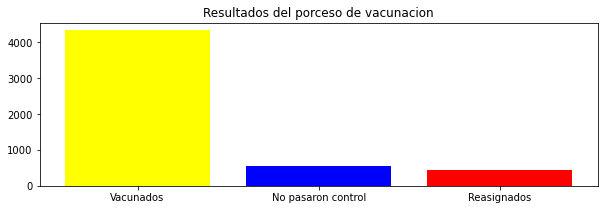

In [14]:

no_control=[key for key in list(estado_personas.keys()) if estado_personas[key]=='no control']
vacunados=[key for key in list(estado_personas.keys()) if estado_personas[key]=='completo']
reasignados=[key for key in list(estado_personas.keys()) if estado_personas[key]=='reasignado']
print('Total personas: ', len(estado_personas))
print('Personas que no pasaron el control: ', len(no_control))
print('Personas vacunadas: ', len(vacunados))
print('Personas que fueron reasignados por falta de stock: ', len(reasignados))

plt.figure(figsize=(10,3))
resl = [len(vacunados), len(no_control), len(reasignados)]
etiquetas = ['Vacunados','No pasaron control','Reasignados']

plt.bar(etiquetas, resl,color=['YELLOW', 'BLUE', 'RED'])

plt.title('Resultados del porceso de vacunacion')
plt.show()